# Notebook 03 - Macro Relationships

Reveal how macro series move together, not in isolation.
This notebook is exploratory by design, but every pattern here feeds later regimes and event studies.

We will:
- reuse transformations from Notebook 02
- introduce correlation, scatter, and lead/lag thinking
- keep everything readable and visual

In [1]:
# imports

import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

from macro_utils.transforms import zscore
from macro_utils.utils import build_transformed_dataset, prepare_plot_df

DATA_RAW = PROJECT_ROOT / "data" / "raw"

In [2]:
# load data

monthly = pd.read_csv(
    DATA_RAW / "fred_monthly.csv",
    index_col=0,
    parse_dates=True
)

monthly.head()

,GDP,CPI,UNRATE,FEDFUNDS
DATE,,,,
1990-01-31,5872.701,127.5,5.4,8.23
1990-02-28,5872.701,128.0,5.3,8.24
1990-03-31,5872.701,128.6,5.2,8.28
1990-04-30,5960.028,128.9,5.4,8.26
1990-05-31,5960.028,129.1,5.4,8.18


In [3]:
# transformed series

df = build_transformed_dataset(monthly)
df.head()

c:\Users\JR\OneDrive\Mini PC\FRED\macro_utils\transforms.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return series.pct_change(periods) * 100
c:\Users\JR\OneDrive\Mini PC\FRED\macro_utils\transforms.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return series.pct_change(1) * 100


,GDP_YoY,CPI_YoY,CPI_MoM,UNRATE,FEDFUNDS
DATE,,,,,
1991-01-31,2.766649,5.647059,0.372578,6.4,6.91
1991-02-28,2.766649,5.312500,0.074239,6.6,6.25
1991-03-31,2.766649,4.821151,0.000000,6.8,6.12
1991-04-30,2.799215,4.809930,0.222552,6.7,5.91
1991-05-31,2.799215,5.034857,0.370096,6.9,5.78


Macro variables do not move independently.

Understanding:
- which series move together
- which lead or lag
- how relationships change over time

is more informative than analyzing any single series alone.

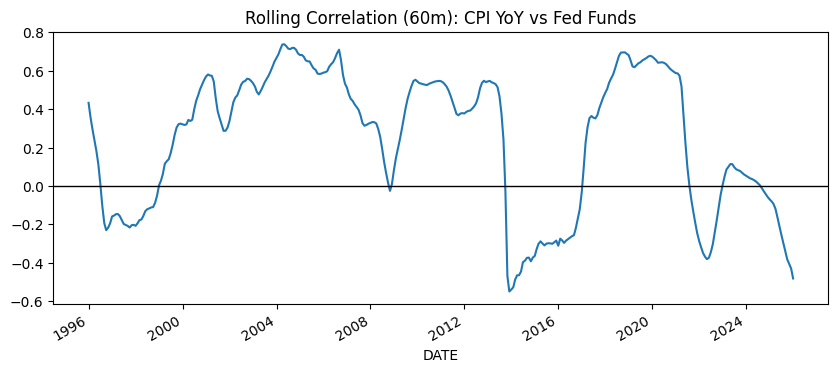

In [4]:
# rolling correlations

rolling_corr = (
    df["CPI_YoY"]
    .rolling(60)
    .corr(df["FEDFUNDS"])
)

rolling_corr.plot(
    figsize=(10, 4),
    title="Rolling Correlation (60m): CPI YoY vs Fed Funds"
)
plt.axhline(0, color="black", lw=1)
plt.show()

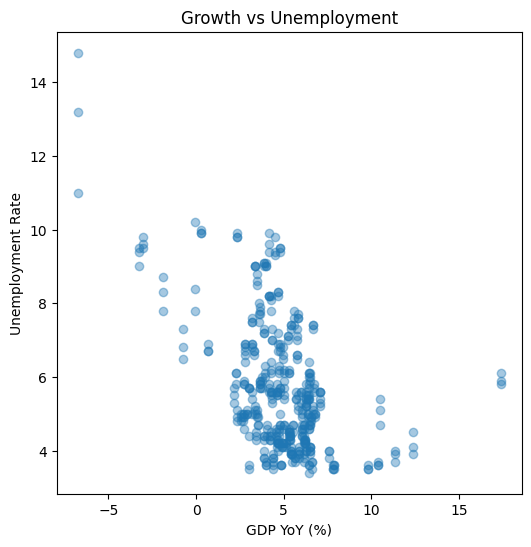

In [5]:
# growht vs labor

plt.figure(figsize=(6, 6))
plt.scatter(df["GDP_YoY"], df["UNRATE"], alpha=0.4)
plt.xlabel("GDP YoY (%)")
plt.ylabel("Unemployment Rate")
plt.title("Growth vs Unemployment")
plt.show()

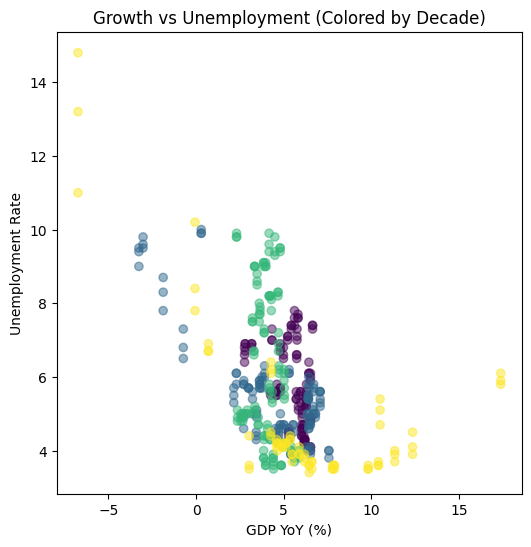

In [6]:
# decade coloring

decades = (df.index.year // 10) * 10

plt.figure(figsize=(6, 6))
plt.scatter(
    df["GDP_YoY"],
    df["UNRATE"],
    c=decades,
    cmap="viridis",
    alpha=0.5
)
plt.xlabel("GDP YoY (%)")
plt.ylabel("Unemployment Rate")
plt.title("Growth vs Unemployment (Colored by Decade)")
plt.show()

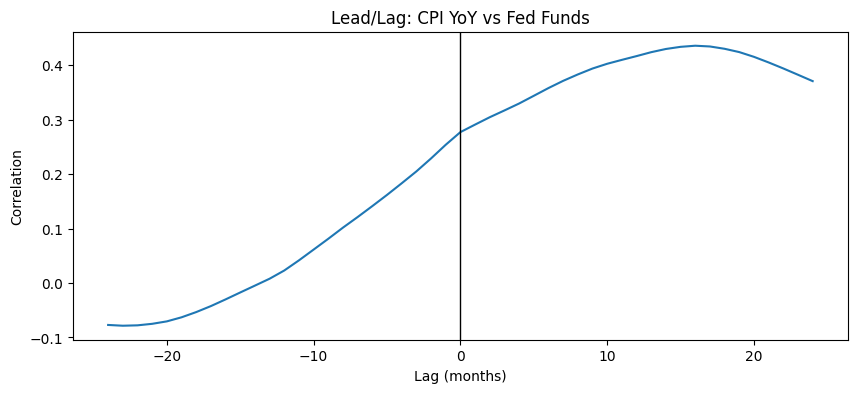

In [7]:
# lead / lag

lags = range(-24, 25)
corrs = []

for lag in lags:
    corrs.append(df["CPI_YoY"].shift(lag).corr(df["FEDFUNDS"]))

plt.figure(figsize=(10, 4))
plt.plot(lags, corrs)
plt.axvline(0, color="black", lw=1)
plt.xlabel("Lag (months)")
plt.ylabel("Correlation")
plt.title("Lead/Lag: CPI YoY vs Fed Funds")
plt.show()

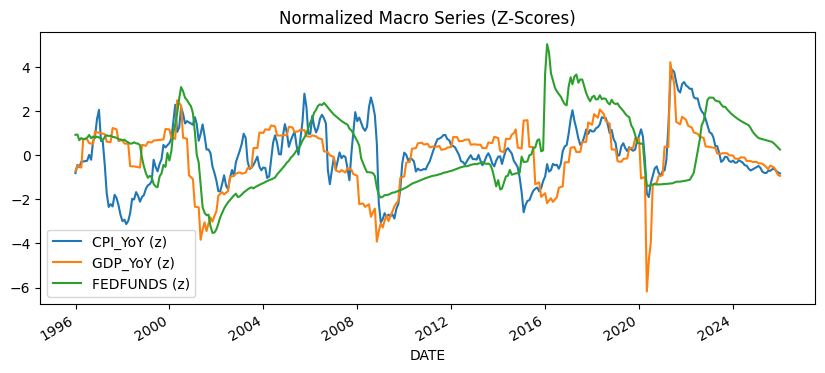

In [8]:
# z-scores

z = pd.DataFrame({
    "CPI_YoY (z)": zscore(df["CPI_YoY"]),
    "GDP_YoY (z)": zscore(df["GDP_YoY"]),
    "FEDFUNDS (z)": zscore(df["FEDFUNDS"]),
})

z.plot(figsize=(10, 4), title="Normalized Macro Series (Z-Scores)")
plt.show()